## Minimizing $z = f(x,y)$ with gradient descent

In [2]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10.0, 10.0)

Populating the interactive namespace from numpy and matplotlib


In [3]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from torch.autograd import Variable
import torch

### Objective function

In [4]:
# constants
theta = 3*np.pi/7
(a, b) = (0.5, 1)
(c, s) = (np.cos(theta), np.sin(theta))

# graph of z = my_fn(x, y) is a paraboloid
# minimum value of 0 achieved at (x, y) = (0, 0)
def my_fn(x, y):
    return a*(c*x - s*y)**2 + b*(s*x + c*y)**2

### Gradient descent

In [5]:
# variables, initialized to (x, y) = (2, 2)
x = Variable(torch.tensor([2], dtype=torch.double), requires_grad = True)
y = Variable(torch.tensor([2], dtype=torch.double), requires_grad = True)

# learning rate
r = 0.2

Ps = [[x.item(), y.item(), my_fn(x.item(), y.item())]]

for _ in range(20):
    z = my_fn(x, y)
    # compute gradient
    z.backward()

    # refine approximation
    x.data -= r*x.grad
    y.data -= r*y.grad
    
    # reinitialize gradient
    x.grad.data.zero_()
    y.grad.data.zero_()
    
    # store refined approximation
    xx = x.item()
    yy = y.item()
    Ps.append([xx, yy, my_fn(xx, yy)])

xyz = np.array(Ps)

### Plot

76800


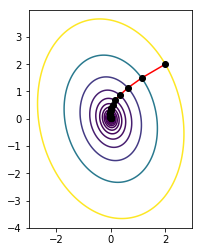

In [6]:
delta = 0.025
(xmin, xmax) = (-3, 3)
(ymin, ymax) = (-4, 4)

x = np.arange(xmin, xmax, delta)
y = np.arange(ymin, ymax, delta)
X, Y = np.meshgrid(x, y)
print(X.size)
Z = my_fn(X, Y)

fig, ax = plt.subplots()
ax.set_aspect('equal')
CS = ax.contour(x, y, Z, np.flip(xyz[:,2], axis=0))
plot(xyz[:,0], xyz[:,1], 'ro', linestyle="solid", mfc='k', mec='k')
plt.show()

### Plot, zoomed in

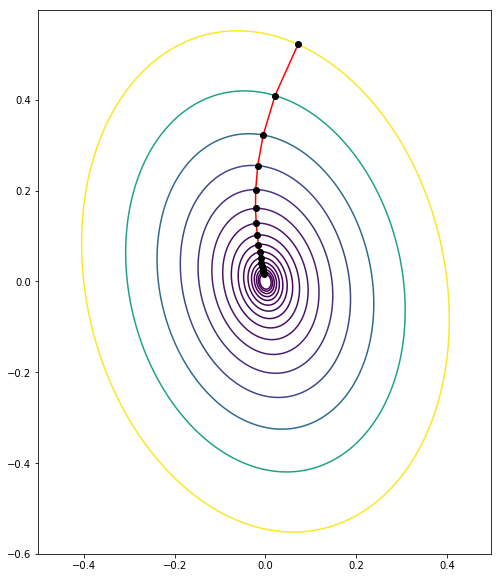

In [7]:
delta = 0.0025
(xmin, xmax) = (-0.5, 0.5)
(ymin, ymax) = (-0.6, 0.6)

x = np.arange(xmin, xmax, delta)
y = np.arange(ymin, ymax, delta)
X, Y = np.meshgrid(x, y)
Z = my_fn(X, Y)

fig, ax = plt.subplots()
ax.set_aspect('equal')
CS = ax.contour(x, y, Z, np.flip(xyz[5:,2], axis=0))
plot(xyz[5:,0], xyz[5:,1], 'ro', linestyle="solid", mfc='k', mec='k')
plt.show()